In [69]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
from PIL import Image

In [58]:
labels_dir = os.path.join(os.getcwd(),'Clean', 'train', 'labels')
labels_paths = [os.path.join(labels_dir, label) for label in os.listdir(labels_dir) if label.endswith('.txt')]

In [59]:
def yoloToBbox(x, y, width, height):
    IMG_WIDTH = 132
    IMG_HEIGHT = 139
    xmin = (x - width / 2) * IMG_WIDTH
    ymin = (y - height / 2) * IMG_HEIGHT
    xmax = (x + width / 2) * IMG_WIDTH
    ymax = (y + height / 2) * IMG_HEIGHT
    return xmin, ymin, xmax, ymax

In [60]:
df = pd.DataFrame(columns=["name", "bbox", "area"])
for i, label in enumerate(labels_paths):
    with open(label, 'r') as file:
        lines = file.readlines()
        idx, x_center, y_center, width, height = list(map(float, lines[0].strip().split()))
        xmin, ymin, xmax, ymax = yoloToBbox(x_center, y_center, width, height)
        tumor_area = ((ymax-ymin)/139) * ((xmax-xmin)/132)
        bbox = [xmin, ymin, xmax, ymax]
        df.loc[i] = [label, bbox, tumor_area]

In [66]:
df = df.sort_values("area")
df

,name,bbox,area
2466,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[85.46762589928058, 78.97727272727273, 86.4172...",0.000055
1953,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[94.01438848920864, 14.742424242424242, 94.964...",0.000055
701,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[77.87050359712231, 36.8560606060606, 78.82014...",0.000055
3421,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[42.733812949640296, 87.40151515151516, 43.683...",0.000055
2086,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[48.431654676258994, 18.954545454545453, 49.38...",0.000055
...,...,...,...
6190,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[0.9496402877697856, 16.848484848484848, 125.3...",0.735394
5508,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[0.0, 24.21969696969698, 127.25179856115108, 1...",0.752235
5509,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[0.0, 22.11363636363636, 127.25179856115108, 1...",0.759538
5507,d:\Workshop\Brain-Tumor-Detection\Clean\train\...,"[0.0, 25.27272727272728, 129.15107913669064, 1...",0.763462


In [65]:
count = df[df["area"] < 0.01]  
len(count)

514

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


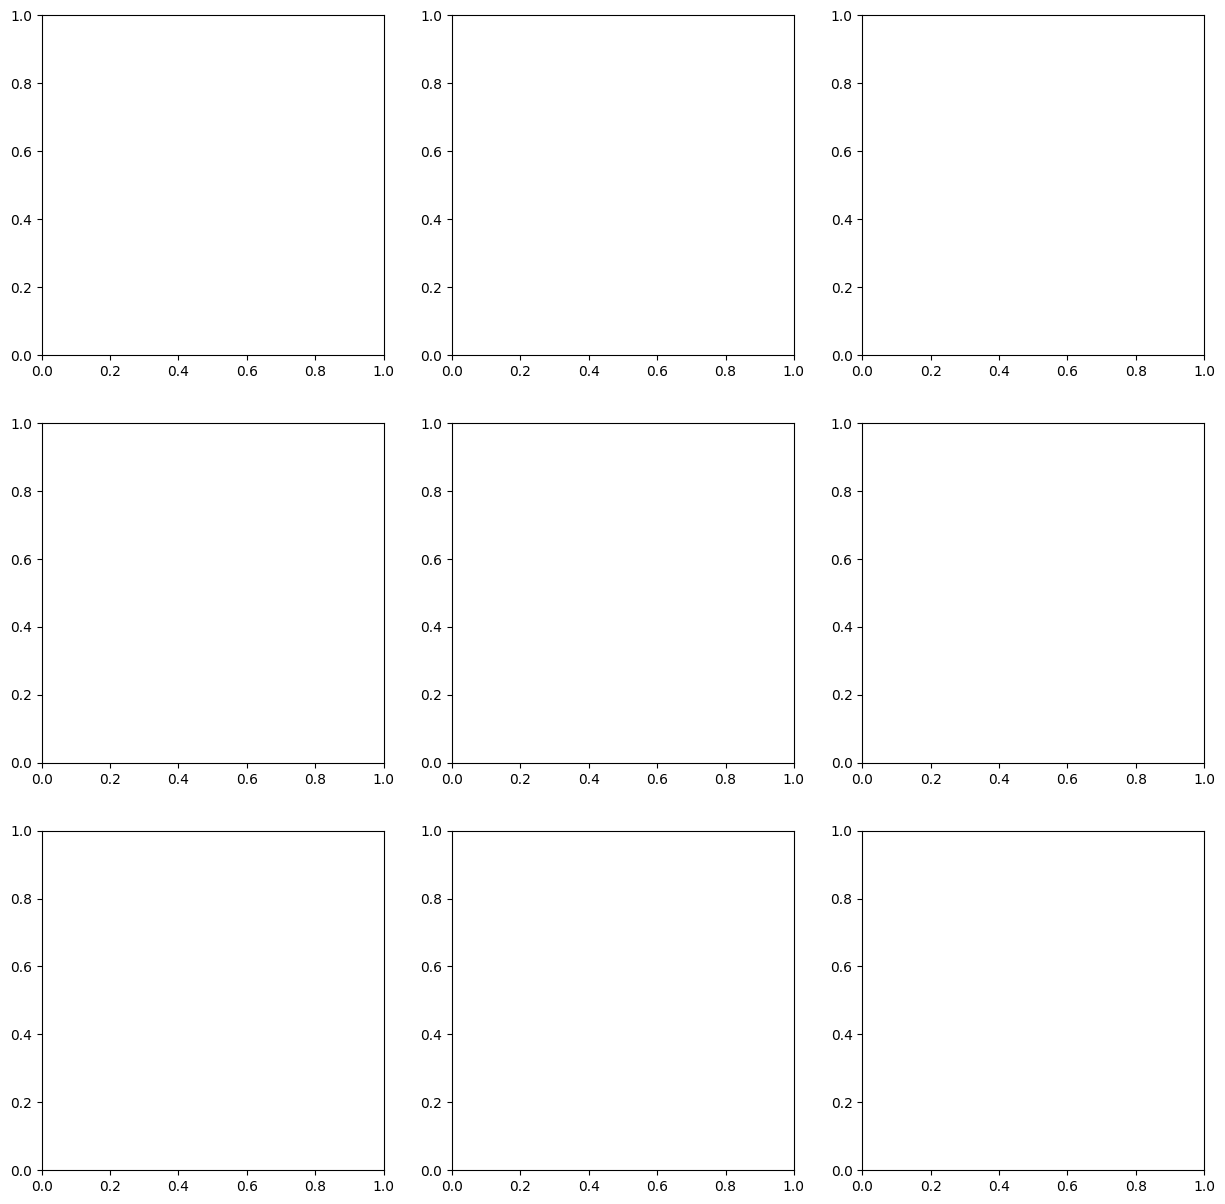

In [72]:
fig, axe = plt.subplots(3, 3, figsize=(15,15))
for i in range(9):
    label_path = df["name"].iloc[i]
    bbox = df["bbox"].iloc[i]
    img_path = label_path.replace("txt", "jpg")
    img_path = img_path.replace("labels", "images")

    image = cv2.imread(img_path)
    plt.subplot(3,3,i+1)
    cv2.rectangle(image, (bbox[0],bbox[1]) , (bbox[2],bbox[3]),(255,0,0),1)
    plt.imshow(image)

plt.show()

    
